# big bazaar Products Analysis

### importing warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

### importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing dataset

In [3]:
df=pd.read_csv("BigBazaarProducts.csv")
df.head(3)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."


## Exploring Dataset

### shape of data

In [4]:
df.shape

(27555, 10)

#### Our data is having 27555 observations with 10 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


### This dataset contains 10 attributes with simple meaning and which are described as follows:

- index - Simply the Index!
- product - Title of the product (as they're listed)
- category - Category into which product has been classified
- sub_category - Subcategory into which product has been kept
- brand - Brand of the product
- sale_price - Price at which product is being sold on the site
- market_price - Market price of the product
- type - Type into which product falls
- rating - Rating the product has got from its consumers
- description - Description of the dataset (in detail)
description - Description of the dataset (in detail)

**Variable "discount" can be created as (marketprice - saleprice)/ market_price * 100 which will help in getting what consumers are getting better here!**

In [6]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


**Here we can observe that the variables such as 'index' and 'description' is of no use in our analysis so we drop these columns**

Dropping "index" and "description" columns

In [7]:
df.drop(["description","index"],axis=1,inplace=True)

In [8]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27555 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18929 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.7+ MB


In [10]:
df.describe()

,sale_price,market_price,rating
count,27555.000000,27555.000000,18929.000000
mean,322.514808,382.056664,3.943410
std,486.263116,581.730717,0.739063
min,2.450000,3.000000,1.000000
25%,95.000000,100.000000,3.700000
50%,190.000000,220.000000,4.100000
75%,359.000000,425.000000,4.300000
max,12500.000000,12500.000000,5.000000


In [11]:
df.nunique()

product         23540
category           11
sub_category       90
brand            2313
sale_price       3256
market_price     1348
type              426
rating             40
dtype: int64

### Checking duplicate values

In [12]:
df.duplicated().sum()

361

There is 361 attributes which have duplicate values

In [13]:
df[df.duplicated()]

,product,category,sub_category,brand,sale_price,market_price,type,rating
243,Glass Amaze Air Tight Jar - Pink,"Kitchen, Garden & Pets",Crockery & Cutlery,Iveo,289.0,358.0,Glassware,NaN
296,Organic Idly Podi - Ginger,Snacks & Branded Foods,Ready To Cook & Eat,Aaha Oho,75.0,75.0,Breakfast & Snack Mixes,3.9
1887,100% Melamine 3D Soup Spoon - Blue,"Kitchen, Garden & Pets",Crockery & Cutlery,Iveo,264.0,264.0,Plates & Bowls,NaN
2139,Classic Sandalwood & Tulsi Hand Wash,Beauty & Hygiene,Bath & Hand Wash,Santoor,209.0,209.0,Hand Wash & Sanitizers,3.8
2952,Chai / Coffee/ Tea-Milk Mug - Sea With Ship Print,"Kitchen, Garden & Pets",Crockery & Cutlery,Rslee,299.0,299.0,"Cups, Mugs & Tumblers",NaN
...,...,...,...,...,...,...,...,...
27178,Rose Gold Beauty Oil,Beauty & Hygiene,Skin Care,The Beauty Co.,975.0,1250.0,Face Care,NaN
27371,"Adult Diapers Economy, Medium",Beauty & Hygiene,Health & Medicine,Friends,425.0,425.0,Adult Diapers,NaN
27375,Taft Ultimate Wax,Beauty & Hygiene,Hair Care,Schwarzkopf,425.0,425.0,Hair Care & Styling,NaN
27412,Whisky Tumblers/Glass,"Kitchen, Garden & Pets",Crockery & Cutlery,Yera,319.0,385.0,Glassware,NaN


#### Deleting duplicate values

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(27194, 8)

### Checking null values

In [16]:
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8461
dtype: int64

### Checking percentage of null values in variable "product" , "brand" and "rating"

Percentage of missing values in "brand" column

In [17]:
float(100.0*(df.brand.isnull().sum()/df.shape[0]))

0.00367728175332794

Percentage of missing values in "product" column

In [18]:
float(100.0*(df['product'].isnull().sum()/df.shape[0]))

0.00367728175332794

Percentage of missing values in "product" column

In [19]:
float(100.0*(df.rating.isnull().sum()/df.shape[0]))

31.113480914907697

## Observation:
### Variable "product" and "brand" has 0.003% of missing values so its better to remove them but  variable "rating" has 31.11% of missing values so we replace missing values with either mean/mode/median or quantile

Droping missing values of variable "brand" and "product"

In [20]:
df.dropna(subset=["product","brand"],inplace=True)

**Now checking satistical data of rating variable**

In [21]:
df.rating.describe()

count    18732.000000
mean         3.944320
std          0.735534
min          1.000000
25%          3.700000
50%          4.100000
75%          4.300000
max          5.000000
Name: rating, dtype: float64

Now we fill the missing rating values with mean value

In [22]:
#df.rating.fillna(df.rating.mean(),inplace=True)

In [23]:
df.rating.describe()

count    18732.000000
mean         3.944320
std          0.735534
min          1.000000
25%          3.700000
50%          4.100000
75%          4.300000
max          5.000000
Name: rating, dtype: float64

In [24]:
df.rating.isnull().sum()

8460

#### Creating new variable "discount" which is discount percentage using 'market_price' and 'sale_price' variables 
- discount = (market_price - sale_price)market_price*100

In [25]:
df['discount']=(df['market_price']-df['sale_price'])/df['market_price']*100

In [26]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,0.000000
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,0.000000
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,52.400000
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,15.340909
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,0.000000


### Finding Outliners

In [27]:
df.describe()

,sale_price,market_price,rating,discount
count,27192.000000,27192.000000,18732.000000,27192.000000
mean,320.794678,380.191688,3.944320,11.844565
std,486.019304,581.484948,0.735534,14.648973
min,2.450000,3.000000,1.000000,0.000000
25%,95.000000,100.000000,3.700000,0.000000
50%,190.000000,220.000000,4.100000,5.000000
75%,351.000000,425.000000,4.300000,20.000000
max,12500.000000,12500.000000,5.000000,83.666667


### Plotting boxplot to find outliners

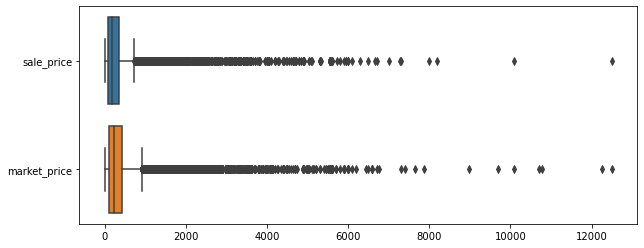

In [28]:
plt.figure(figsize=[10,4])
sns.boxplot(data=df[["sale_price", "market_price"]], orient="h")
plt.show()

In [29]:
df=df.loc[df["sale_price"]<11000]
df=df.loc[df["market_price"]<11000]
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,0.000000
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,0.000000
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,52.400000
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,15.340909
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,0.000000


In [30]:
df.loc[df.sale_price>11000]

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount


In [31]:
df.loc[df.market_price>11000]

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount


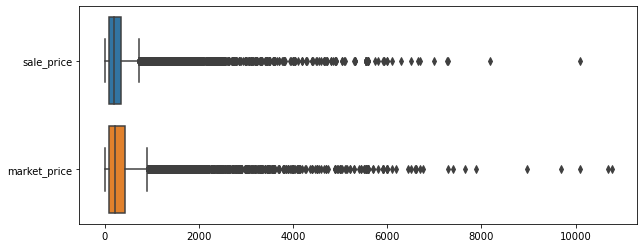

In [32]:
plt.figure(figsize=[10,4])
sns.boxplot(data=df[["sale_price", "market_price"]], orient="h")
plt.show()

In [33]:
df.columns

Index(['product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'discount'],
      dtype='object')

Fresho              638
bb Royal            539
BB Home             428
DP                  243
Fresho Signature    170
bb Combo            167
Amul                153
INATUR              142
Himalaya            141
Dabur               137
Name: brand, dtype: int64

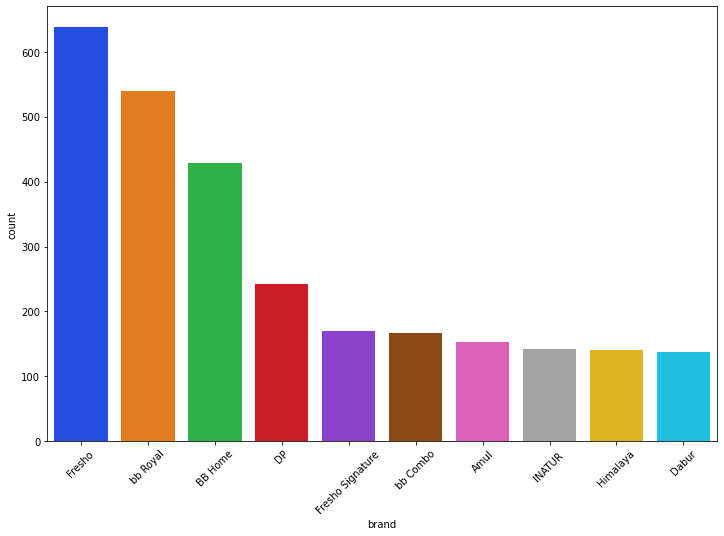

In [34]:
sns.set_palette("bright")
plt.figure(figsize=(12,8))
chart = sns.countplot(x="brand", data=df, order=pd.value_counts(df['brand']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
df['brand'].value_counts().head(10)

Beauty & Hygiene            7677
Gourmet & World Food        4677
Kitchen, Garden & Pets      3455
Snacks & Branded Foods      2809
Foodgrains, Oil & Masala    2673
Cleaning & Household        2649
Beverages                    883
Bakery, Cakes & Dairy        850
Baby Care                    610
Fruits & Vegetables          557
Name: category, dtype: int64

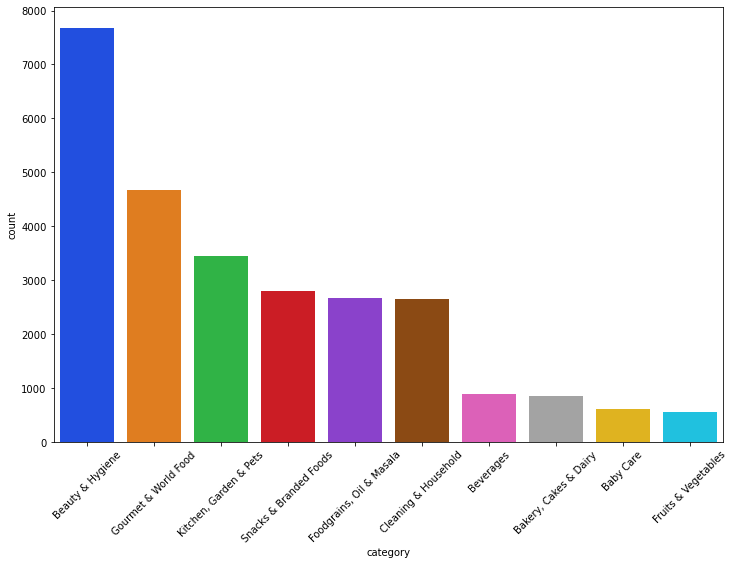

In [35]:
sns.color_palette("rocket")
plt.figure(figsize=(12,8))
chart = sns.countplot(x="category", data=df, order=pd.value_counts(df['category']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
df['category'].value_counts().head(10)

In [36]:
data = df[df['rating'] >= 4]


In [39]:
data = pd.DataFrame(df.groupby('category')['rating'].sum()).reset_index()
data.columns = ['category', 'rating']
data

,category,rating
0,Baby Care,1995.8
1,"Bakery, Cakes & Dairy",2600.9
2,Beauty & Hygiene,21037.9
3,Beverages,2585.6
4,Cleaning & Household,8246.2
5,"Eggs, Meat & Fish",0.0
6,"Foodgrains, Oil & Masala",8896.5
7,Fruits & Vegetables,0.0
8,Gourmet & World Food,9529.5
9,"Kitchen, Garden & Pets",9177.8


In [40]:
data = data[data['rating'] >= 4]
data

,category,rating
0,Baby Care,1995.8
1,"Bakery, Cakes & Dairy",2600.9
2,Beauty & Hygiene,21037.9
3,Beverages,2585.6
4,Cleaning & Household,8246.2
6,"Foodgrains, Oil & Masala",8896.5
8,Gourmet & World Food,9529.5
9,"Kitchen, Garden & Pets",9177.8
10,Snacks & Branded Foods,9814.8


In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x='rating', data=data,)
plt.show()